Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Reading the dataset

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
meal_info = pd.read_csv("meal_info.csv")
center_info = pd.read_csv("fulfilment_center_info.csv")

Exploratory data analysis

In [3]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [4]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32573 entries, 0 to 32572
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32573 non-null  int64  
 1   week                   32573 non-null  int64  
 2   center_id              32573 non-null  int64  
 3   meal_id                32573 non-null  int64  
 4   checkout_price         32573 non-null  float64
 5   base_price             32573 non-null  float64
 6   emailer_for_promotion  32573 non-null  int64  
 7   homepage_featured      32573 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 2.0 MB


In [7]:
train['num_orders'].describe()

count    456548.000000
mean        261.872760
std         395.922798
min          13.000000
25%          54.000000
50%         136.000000
75%         324.000000
max       24299.000000
Name: num_orders, dtype: float64

Checking for null values

In [8]:
train.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

Reading and merging.csv files

In [9]:

trainfinal = pd.merge(train, meal_info, on="meal_id", how="outer")
trainfinal = pd.merge(trainfinal,center_info, on="center_id", how="outer")
trainfinal.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,601.553399,56.614566,4.083590
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,66.195914,17.641306,1.091686
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,456.000000,23.000000,0.900000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000,553.000000,34.000000,3.600000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,596.000000,56.000000,4.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000,651.000000,77.000000,4.500000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,713.000000,93.000000,7.000000


In [10]:
trainfinal = trainfinal.drop(['center_id', 'meal_id'], axis=1)
trainfinal.head()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


Dropping columns

In [11]:
cols = trainfinal.columns.tolist()
print(cols)

['id', 'week', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category', 'cuisine', 'city_code', 'region_code', 'center_type', 'op_area']


In [12]:
cols = cols[:2] + cols[9:] + cols[7:9] + cols[2:7] 
print(cols)

['id', 'week', 'city_code', 'region_code', 'center_type', 'op_area', 'category', 'cuisine', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders']


In [13]:
trainfinal = trainfinal[cols]
trainfinal.dtypes

id                         int64
week                       int64
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
category                  object
cuisine                   object
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
dtype: object

In [14]:
#sns.regplot(x=trainfinal['cuisine'],y=trainfinal['num_orders'])

<Axes: xlabel='num_orders', ylabel='week'>

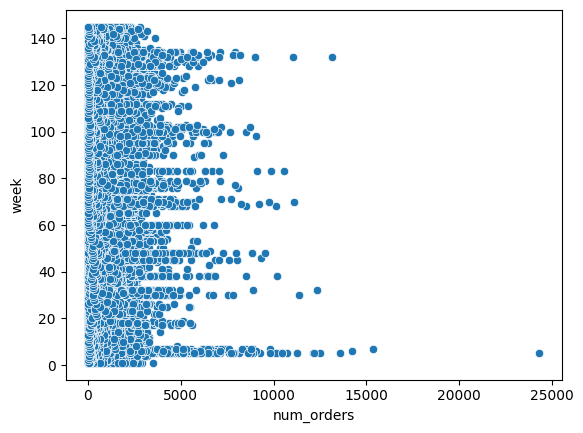

In [15]:
#sns.pairplot(data=trainfinal[trainfinal.columns])
sns.scatterplot(x=trainfinal['num_orders'],y=trainfinal['week'])

In [16]:
from sklearn.preprocessing import LabelEncoder


Label encoding

In [17]:
trainfinal.head()

,id,week,city_code,region_code,center_type,op_area,category,cuisine,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,647,56,TYPE_C,2.0,Beverages,Thai,136.83,152.29,0,0,177
1,1018704,2,647,56,TYPE_C,2.0,Beverages,Thai,135.83,152.29,0,0,323
2,1196273,3,647,56,TYPE_C,2.0,Beverages,Thai,132.92,133.92,0,0,96
3,1116527,4,647,56,TYPE_C,2.0,Beverages,Thai,135.86,134.86,0,0,163
4,1343872,5,647,56,TYPE_C,2.0,Beverages,Thai,146.50,147.50,0,0,215


In [18]:
trainfinal.shape

(456548, 13)

data visualization

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3012\1892534162.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trainfinal.num_orders, bins = 25)


Text(0.5, 1.0, 'num_orders Distribution')

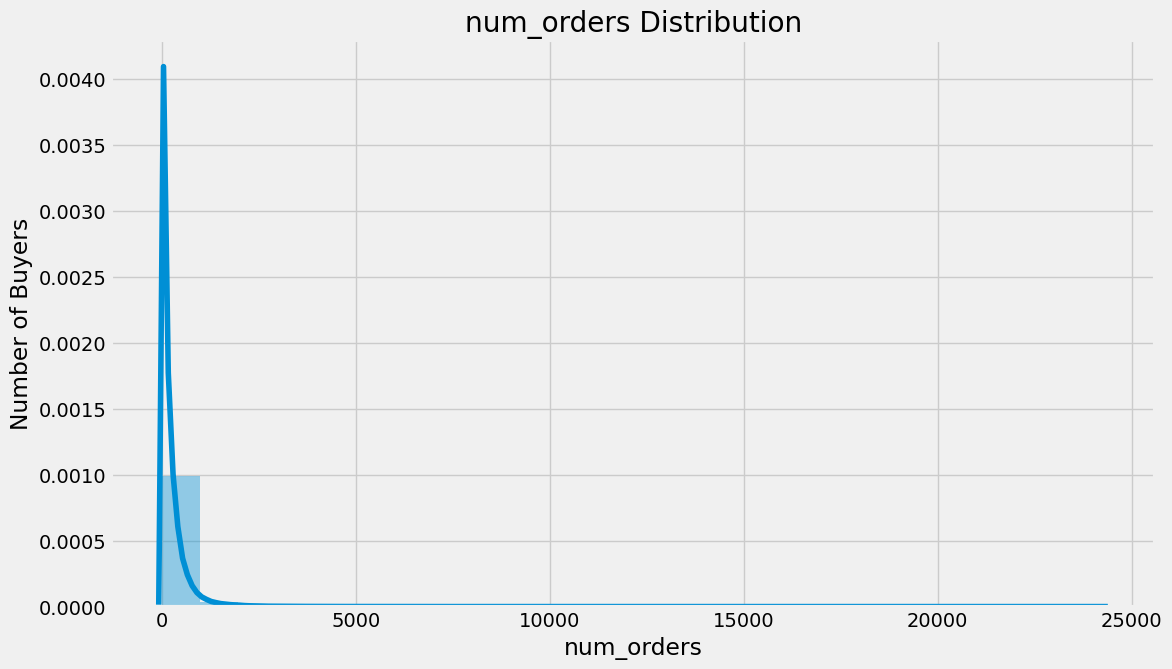

In [19]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(trainfinal.num_orders, bins = 25)
plt.xlabel("num_orders")
plt.ylabel("Number of Buyers")
plt.title("num_orders Distribution")

In [20]:
trainfinal2 = trainfinal.drop(['id'], axis=1)
correlation = trainfinal2.corr(method='pearson')
columns = correlation.nlargest(8, 'num_orders').index
columns

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3012\3942159812.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = trainfinal2.corr(method='pearson')


Index(['num_orders', 'homepage_featured', 'emailer_for_promotion', 'op_area',
       'city_code', 'region_code', 'week', 'base_price'],
      dtype='object')

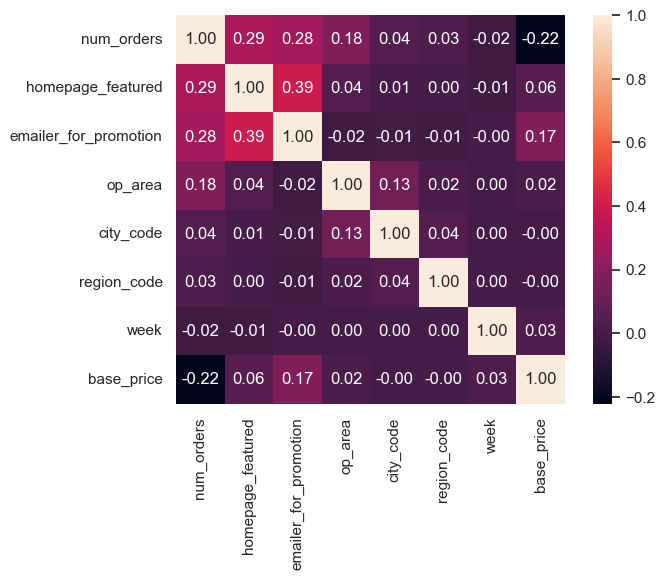

In [21]:
correlation_map = np.corrcoef(trainfinal2[columns].values.T)
sns.set(font_scale=1.0) 
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

spliting the dataset into dependent and independent variable

In [22]:
features = columns.drop(['num_orders'])
trainfinal3 = trainfinal[features]
X = trainfinal3.values
Y = trainfinal['num_orders'].values
trainfinal3.head()

,homepage_featured,emailer_for_promotion,op_area,city_code,region_code,week,base_price
0,0,0,2.0,647,56,1,152.29
1,0,0,2.0,647,56,2,152.29
2,0,0,2.0,647,56,3,133.92
3,0,0,2.0,647,56,4,134.86
4,0,0,2.0,647,56,5,147.50


Split the dataset into train set and test set

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.25)

Train and test model algorithms

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

Model Evalution

In [25]:
XG = XGBRegressor()
XG.fit(X_train, Y_train)
y_pred = XG.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(Y_val, y_pred)))

RMSLE: 90.10594805283775


In [26]:
LR = LinearRegression()
LR.fit(X_train, Y_train)
y_pred = LR.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(Y_val, y_pred)))

RMSLE: 154.7307821941464


In [27]:
L = Lasso()
L.fit(X_train, Y_train)
y_pred = L.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(Y_val, y_pred)))

RMSLE: 153.38832348908275


In [28]:
EN = ElasticNet()
EN.fit(X_train, Y_train)
y_pred = EN.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(Y_val, y_pred)))

RMSLE: 128.67702796222517


In [29]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT.fit(X_train, Y_train)
y_pred = DT.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(Y_val, y_pred)))

RMSLE: 89.4188416988527


In [30]:
KNN = DecisionTreeRegressor()
KNN.fit(X_train, Y_train)
y_pred = KNN.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(Y_val, y_pred)))

RMSLE: 89.36261796265315


In [31]:
GB = DecisionTreeRegressor()
GB.fit(X_train, Y_train)
y_pred = GB.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(Y_val, y_pred)))

RMSLE: 89.34722405541305


Save the model

In [32]:
import pickle
pickle.dump(DT,open('fdemand.pkl','wb'))